You are working for an airline company looking to enter the United States domestic market.
Specifically, the company has decided to start with 5 round trip routes between medium and
large US airports. An example of a round trip route is the combination of JFK to ORD and ORD
to JFK. The airline company has to acquire 5 new airplanes (one per round trip route) and the
upfront cost for each airplane is $90 million. The company’s motto is “On time, for you”, so
punctuality is a big part of its brand image.
You have been tasked with analyzing 1Q2019 data to identify:

1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
Exclude canceled flights when performing the calculation.<br><br>

2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of
other key components and total round trip flights in the quarter for the top 10 most
profitable routes. Exclude canceled flights from these calculations.<br><br>

3. The 5 round trip routes that you recommend to invest in based on any factors that you
choose.<br><br>

4. The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.<br><br>

5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.<br><br>

In [103]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
import statistics

In [104]:
# Adding the file path I need

# FILL WITH YOUR OWN TO RUN THE NOTEBOOK
file_path = '/Users/jean_taylor_1/Downloads/data/'

## Functions used in this analysis

In [105]:
def columns_to_dtype_int32(df, columns):
    """
    Convert specified columns in a DataFrame to dtype int32.

    This function changes the data type of the given columns to 32-bit integers.
    It assumes that the columns contain values that can be safely cast to int32.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list of str): List of column names to convert to int32.

    Returns:
        pd.DataFrame: A DataFrame with the specified columns converted to int32 dtype.
    """
    for cols in columns:
        df[cols] = df[cols].astype('int32')
    return df



def columns_to_numeric(df, columns):
    """
    Convert specified columns in a DataFrame to numeric values.

    Attempts to convert each specified column to a numeric dtype.
    Non-convertible values will be set to NaN.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list of str): List of column names to convert.

    Returns:
        pd.DataFrame: The DataFrame with specified columns converted to numeric types.
    """
    for cols in columns:
        df[cols] = pd.to_numeric(df[cols], errors='coerce')
    return df



def boxplots_for_columns(df, df_columns):
    """
    Generate horizontal boxplots for specified columns in a DataFrame.

    For each column provided, this function creates and displays a horizontal boxplot,
    excluding missing values. Each plot is shown individually with labeled axes and
    an appropriate title.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        df_columns (list of str): List of column names to generate boxplots for.

    Returns:
        None: The function displays plots but does not return any value.
    """
    for cols in df_columns:
        plt.figure(figsize=(5, 5))
        plt.boxplot(df[[cols]].dropna(), vert=False, patch_artist=True)
        plt.title('Boxplot for ' + cols)
        plt.xlabel(cols)
        plt.tight_layout()
        plt.show()


def fill_NaNs_with_median(df, columns):
    """
    Fill missing (NaN) values in specified columns of a DataFrame with the median of each column.

    Parameters:
    df (pd.DataFrame): The input pandas DataFrame containing the data.
    columns (list of str): A list of column names in which to fill NaN values.

    Modifies:
    The function modifies the input DataFrame in place by replacing NaN values in the specified columns 
    with the median value of each respective column.

    Note:
    This function uses the Python standard library's `statistics.median` function to compute medians.
    """
    for cols in columns:
        values_without_NaNs = df[cols].dropna().tolist()
        median_value = statistics.median(values_without_NaNs)
        df[cols].fillna(median_value, inplace=True)

        
        
def fill_NaNs_with_mean(df, columns):
    """
    Fill missing (NaN) values in specified columns of a DataFrame with the mean of each column.

    Parameters:
    df (pd.DataFrame): The input pandas DataFrame containing the data.
    columns (list of str): A list of column names in which to fill NaN values.

    Modifies:
    The function modifies the input DataFrame in place by replacing NaN values in the specified columns 
    with the mean value of each respective column.

    Note:
    This function uses the Python standard library's `statistics.mean` function to compute means.
    """
    for cols in columns:
        values_without_NaNs = df[cols].dropna().tolist()
        mean_value = statistics.mean(values_without_NaNs)
        df[cols].fillna(mean_value, inplace=True)
        
        
        

        
def describe_columns(df, columns):
    """
    Generates descriptive statistics for specified columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list of str): A list of column names for which to compute descriptive statistics.

    Returns:
    pd.io.formats.style.Styler: A styled DataFrame where each row corresponds to a column's statistics,
    including count, mean, std, min, 25%, 50%, 75%, and max, formatted to 4 decimal places.
    """
    descriptions = {}
    for cols in columns:
        descriptions[cols] = df[cols].describe()
    
    summary_df = pd.DataFrame(descriptions).T  # Transpose so columns become rows
    
    return summary_df.style.format("{:.4f}")  # Optional formatting




def get_columns_to_category(df, columns):
    """
    Converts specified columns in a DataFrame to the 'category' data type.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list of str): A list of column names to convert to categorical type.

    Returns:
    pd.DataFrame: The updated DataFrame with specified columns converted to 'category' dtype.
    
    Notes:
    - If a column is not found in the DataFrame, a warning is printed.
    - If a conversion fails, the exception is caught and an error message is printed.
    """

    for cols in columns:
        if cols in df.columns:
            try:
                df[cols] = df[cols].astype('category')
            except Exception as e:
                print(f"Error converting column '{cols}' to category: {e}")
        else:
            print(f"Warning: Column '{cols}' not found in DataFrame.")
    return df


def create_ROUTE_column(df, origin, destination):
    """
    Creates a new 'ROUTE' column in the DataFrame by combining the origin and destination columns.

    The function concatenates the string values of the specified origin and destination columns
    with a hyphen (e.g., 'JFK-LAX') and assigns it to a new column named 'ROUTE'. It then converts 
    the 'ROUTE' column to a categorical type for efficiency.

    Parameters:
    df (pd.DataFrame): The DataFrame containing flight data.
    origin (str): The name of the column representing the origin airport code.
    destination (str): The name of the column representing the destination airport code.

    Returns:
    pd.Series: The newly created 'ROUTE' column as a categorical series.
    """
    
    df['ROUTE'] = df[origin].astype(str) + '-' + df[destination].astype(str)
   
    get_columns_to_category(df, ['ROUTE'])
    
    return df['ROUTE']
    
    
    
    
def bar_chart(x, y, title, xlabel, ylabel, color):
    """
    Generates a customizable bar chart using matplotlib.

    This function creates a bar chart with the provided x and y data. It allows for
    customization of the title, axis labels, and color map. The x-axis labels are rotated
    for better readability, and the chart layout is automatically adjusted to fit content.

    Parameters:
    x (list or array-like): Categories or labels for the x-axis.
    y (list or array-like): Numeric values corresponding to each x label.
    title (str): The title of the chart.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    color (str): Name of the matplotlib colormap to use (e.g., 'viridis', 'plasma', 'tab10').

    Returns:
    None: Displays the bar chart using plt.show().
    """

    # Colors
    cmap = cm.get_cmap(color)  # or 'plasma', 'tab10', 'Set1', etc.
    colors = [cmap(i / len(x)) for i in range(len(x))]

    plt.figure(figsize=(12, 8))
    plt.bar(x, y, color=colors)

    # Add title and labels
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=18)  
    plt.yticks(fontsize=15)
    plt.tight_layout()  # Ensure labels fit within the figure

    
    # Show plot
    plt.show()
    
    
    
def merge_dfs_by_route(df1, df2):
    """
    Merges two DataFrames on the 'ROUTE' column using an inner join.

    Parameters:
    df1 (pd.DataFrame): The first DataFrame containing a 'ROUTE' column.
    df2 (pd.DataFrame): The second DataFrame containing a 'ROUTE' column.

    Returns:
    pd.DataFrame: A new DataFrame containing rows where 'ROUTE' values are present in both df1 and df2.
    """
    merged_df = pd.merge(df1, df2, on='ROUTE', how='inner')

    return merged_df



def create_standardized_route_col(df):
    """
    Creates a standardized version of the 'ROUTE' column by alphabetically ordering 
    the origin and destination airport codes.

    This helps ensure that routes like 'JFK-LAX' and 'LAX-JFK' are treated as the same.

    Parameters:
    df (pd.DataFrame): A DataFrame containing a 'ROUTE' column with values in the format 'ORIGIN-DESTINATION'.

    Returns:
    pd.DataFrame: The original DataFrame with an additional 'STANDARDIZED_ROUTE' column,
                  where each route is sorted alphabetically (e.g., 'JFK-LAX' and 'LAX-JFK' become 'JFK-LAX').
    """
    df['ROUTE'] = df['ROUTE'].str.strip()
    split_routes = df['ROUTE'].str.split('-', expand=True)
    sorted_routes = pd.DataFrame(np.sort(split_routes.values, axis=1), columns=['airport1', 'airport2'])
    df['STANDARDIZED_ROUTE'] = sorted_routes['airport1'] + '-' + sorted_routes['airport2']
    return df


def get_reverse_route_and_their_counts(df, route, reverse_route_col_name, reverse_count_col_name):
    """
    Adds columns to a DataFrame representing the reverse of each route and the corresponding flight count for that reverse route.

    This is useful for analyzing round-trip activity or determining if a return flight exists and how frequent it is.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing a route column and a 'FLIGHT_COUNT' column.
    route (str): The name of the column in df containing route strings in the format 'ORIGIN-DESTINATION'.
    reverse_route_col_name (str): The name of the new column to be created containing reverse routes.
    reverse_count_col_name (str): The name of the new column to be created containing the flight count of the reverse routes.

    Returns:
    pd.DataFrame: The original DataFrame with two additional columns:
        - reverse_route_col_name: the reverse of the original route (e.g., 'LAX-JFK' becomes 'JFK-LAX').
        - reverse_count_col_name: the number of flights on the reverse route, or 0 if not found.
    """
    df[reverse_route_col_name] = df[route].str.split('-').str[::-1].str.join('-')
    df[reverse_count_col_name] = df[reverse_route_col_name].map(df.set_index('ROUTE')['FLIGHT_COUNT'])
    df[reverse_count_col_name] = df[reverse_count_col_name].fillna(0) # if no mattching return flight it will return NaN
    df[reverse_count_col_name] = df[reverse_count_col_name].astype('int32')
    return df


def get_true_roundtrip_counts_per_route(df):
    """
    Calculates the number of true round trips per route by taking the minimum 
    of the forward and reverse flight counts.

    This helps identify how many complete round trips occurred between two locations, 
    assuming that a round trip requires both an outbound and a return flight.

    Parameters:
    df (pd.DataFrame): A DataFrame containing 'FLIGHT_COUNT' (outbound) and 
                       'REVERSE_ROUTE_COUNT' (inbound) columns.

    Returns:
    pd.DataFrame: The original DataFrame with an additional 'TRUE_ROUNDTRIPS' column, 
                  representing the count of complete round trips per route.
    """
    df['TRUE_ROUNDTRIPS'] = np.minimum(df['FLIGHT_COUNT'], df['REVERSE_ROUTE_COUNT'])
    return df


## Understand data sources provided

## Understand Airport Codes.csv<h2>

In [106]:
airport_codes = pd.read_csv(file_path + 'Airport_Codes.csv')

In [107]:
airport_codes.head(10)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"
5,small_airport,Fulton Airport,1100.0,NaN,US,Alex,NaN,"-97.8180194, 34.9428028"
6,small_airport,Cordes Airport,3810.0,NaN,US,Cordes,NaN,"-112.16500091552734, 34.305599212646484"
7,small_airport,Goldstone /Gts/ Airport,3038.0,NaN,US,Barstow,NaN,"-116.888000488, 35.350498199499995"
8,small_airport,Williams Ag Airport,87.0,NaN,US,Biggs,NaN,"-121.763427, 39.427188"
9,heliport,Kitchen Creek Helibase Heliport,3350.0,NaN,US,Pine Valley,NaN,"-116.4597417, 32.7273736"


In [108]:
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


## Understand Flights.csv

In [109]:
flights = pd.read_csv(file_path + 'Flights.csv')

/var/folders/9b/4_3pqpvx3fs3ccpkbgvs21n40000gp/T/ipykernel_2400/3083784813.py:1: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(file_path + 'Flights.csv')


In [110]:
flights.head(100)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-03-02,WN,N8652B,2516,14679,SAN,"San Diego, CA",14893,SMF,"Sacramento, CA",-5.0,-10.0,0.0,76.0,480.0,0.36
96,2019-03-02,WN,N8671D,2789,14679,SAN,"San Diego, CA",14893,SMF,"Sacramento, CA",35.0,32.0,0.0,74.0,480.0,0.70
97,2019-03-02,WN,N966WN,3468,14679,SAN,"San Diego, CA",14893,SMF,"Sacramento, CA",2.0,0.0,0.0,72.0,480.0,0.87
98,2019-03-02,WN,N906WN,3544,14679,SAN,"San Diego, CA",14893,SMF,"Sacramento, CA",-1.0,-11.0,0.0,69.0,480.0,0.44


In [111]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [112]:
flights.isnull().sum()

FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12156
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50351
ARR_DELAY            55991
CANCELLED                0
AIR_TIME             56551
DISTANCE               630
OCCUPANCY_RATE         310
dtype: int64

## Understand Tickets.csv

In [113]:
tickets = pd.read_csv(file_path + 'Tickets.csv')

In [114]:
tickets.head(100)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM
...,...,...,...,...,...,...,...,...,...,...,...,...
95,201912723177,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1332.0,EGE
96,201912723009,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,409.0,BWI
97,201912723372,2019,1,ABI,US,TX,Texas,1.0,MQ,4.0,678.0,LAS
98,201912723367,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,548.0,LAS


In [115]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


## Data Cleaning Section
### We will work thorugh each df and do the necessary cleaning for each


### Data Cleaning - Flights data

In [116]:
# Check for duplicates across all columns
flights.duplicated().sum()

4545

In [117]:
# Remove duplicates
flights_cleaned = flights.drop_duplicates(keep = 'first')

In [118]:
# Starting a new df to work on the flight data
# Capturing the columns we want
flights_cleaned = flights_cleaned[['FL_DATE', 'ORIGIN', 'DESTINATION','DEP_DELAY', 'ARR_DELAY', 'DISTANCE',\
                    'OCCUPANCY_RATE','CANCELLED']]

In [119]:
# Instructions said to ignore cancelled flights in analysis
flights_cleaned['CANCELLED'].value_counts()

0.0    1859862
1.0      51479
Name: CANCELLED, dtype: int64

In [120]:
flights_cleaned = flights_cleaned[flights_cleaned['CANCELLED'] == 0].reset_index(drop=True)

In [121]:
# Checking the format of the dates, since they can be tricky and problematic
flights_cleaned['FL_DATE'].unique()

array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-26',
       '2019-02-27', '2019-02-28', '2019-02-01', '2019-02-02',
       '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',
       '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14',
       '2019-02-15', '2019-02-16', '2019-02-25', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [122]:
# Getting column to datetime
flights_cleaned['FL_DATE'] = pd.to_datetime(flights_cleaned['FL_DATE'])

In [123]:
# Checking the dtypes of the columns
flights_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859862 entries, 0 to 1859861
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   FL_DATE         datetime64[ns]
 1   ORIGIN          object        
 2   DESTINATION     object        
 3   DEP_DELAY       float64       
 4   ARR_DELAY       float64       
 5   DISTANCE        object        
 6   OCCUPANCY_RATE  float64       
 7   CANCELLED       float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 113.5+ MB


In [124]:
# Changing DISTANCE to numeric
flights_cleaned = columns_to_numeric(flights_cleaned, ['DISTANCE'])

In [125]:
# Lets look fo NaN values
flights_cleaned.isnull().sum()

FL_DATE              0
ORIGIN               0
DESTINATION          0
DEP_DELAY            0
ARR_DELAY         4368
DISTANCE           268
OCCUPANCY_RATE      31
CANCELLED            0
dtype: int64

### We have some missing values we will have to handle.
#### Lets plot them to see what the data looks like 

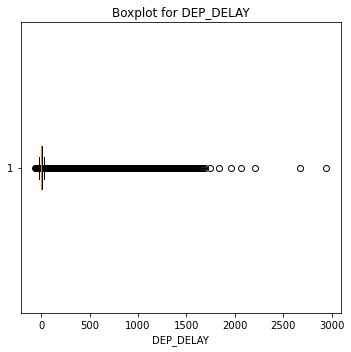

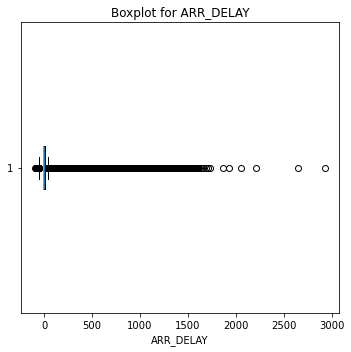

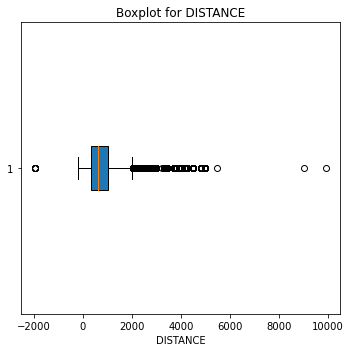

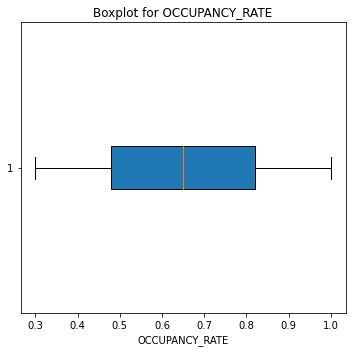

In [126]:
boxplots_for_columns(flights_cleaned, ('DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'OCCUPANCY_RATE'))

### We will use statistical imputation to fill the missing values
Since the delay times are important for determining fines and cost for routes later. If we remove the ~50,000 observations here for ech column, it may effect the costs for routes significantly. Although imputation is not perfect, it is a reasonable approximation of what the value would.
- We will fill NaNs for `DEP_DELAY`, `ARR_DELAY` and `DISTANCE` with their median value since they have skew.<br>
- We will fill NaNs for`OCCUPANCY_RATE` with its mean since it appears normally distributed.

Before we do that, I do see there is a `DISTANCE` value that is `-2000` roughly. Lets inspect it.

In [127]:
flights_cleaned[flights_cleaned['DISTANCE'] < 0]

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,CANCELLED
1859491,2019-03-06,ATL,LAX,-5.0,6.0,-1947.0,0.477301,0.0
1859492,2019-03-07,ATL,LAX,-1.0,-10.0,-1947.0,0.515156,0.0
1859493,2019-03-08,ATL,LAX,24.0,41.0,-1947.0,0.493234,0.0
1859494,2019-03-09,ATL,LAX,-5.0,16.0,-1947.0,0.559034,0.0
1859495,2019-03-10,ATL,LAX,-3.0,-14.0,-1947.0,0.739514,0.0
1859496,2019-03-11,ATL,LAX,-6.0,-3.0,-1947.0,0.721876,0.0
1859497,2019-03-12,ATL,LAX,-2.0,-9.0,-1947.0,0.379233,0.0
1859499,2019-03-08,JFK,ORD,4.0,-9.0,-198.0,0.336533,0.0
1859500,2019-03-09,JFK,ORD,-5.0,1.0,-198.0,0.824739,0.0
1859501,2019-03-10,JFK,ORD,-2.0,-12.0,-198.0,0.964975,0.0


- Looking at online sources, the flight distance from `ATL -> LAX` appears to be the right magnitude, but negative instead of positive<br>
- `JFK -> LAX` does not appear to be correct, as they are about ~730 miles apart<br>



In [128]:
flights_cleaned.loc[(flights_cleaned['ORIGIN'] == 'ATL')\
                    & (flights_cleaned['DESTINATION'] == 'LAX'), 'DISTANCE'] = 1947.0

flights_cleaned.loc[(flights_cleaned['ORIGIN'] == 'JFK')\
                    & (flights_cleaned['DESTINATION'] == 'ORD'), 'DISTANCE'] = 738.0

In [129]:
# Stats on columns we want to impute
describe_columns(flights_cleaned, ('DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'OCCUPANCY_RATE'))

,count,mean,std,min,25%,50%,75%,max
DEP_DELAY,1859862.0000,10.7807,50.0918,-63.0000,-6.0000,-2.0000,7.0000,2941.0000
ARR_DELAY,1855494.0000,5.6602,52.4316,-94.0000,-15.0000,-6.0000,8.0000,2923.0000
DISTANCE,1859608.0000,772.2767,581.7550,2.0000,344.0000,612.0000,1013.0000,9898.0000
OCCUPANCY_RATE,1859831.0000,0.6502,0.2020,0.3000,0.4800,0.6500,0.8200,1.0000


- According to the `Flights.csv` metadata: `DEP_DELAY` and `ARR_DELAY` is the time delta between the scheduled time and actual time it occured. This explains the negative values.
- `DISTANCE` has a `min` of 2 miles. Lets inspect that

In [130]:
# Flights with low distances
flights_cleaned[flights_cleaned['DISTANCE'] < 5]

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,CANCELLED
1859374,2019-03-02,RSW,MCI,-7.0,-5.0,2.0,0.838784,0.0
1859385,2019-01-01,RSW,PVD,-5.0,-13.0,2.0,0.375903,0.0


- RSW (Fort Myers Florida) is not 2 miles from MCI (Kansas City) but 1,155 miles
- RSW is also not PVD (Providence, Rhode Island) but 1,201 miles <br>
- I will manually fix these
### Potential data check<br>
- If I had more time, I would merge the coordinates of these airports onto this flight data and confirm the distances between the two are reasonable. This would catch more data errors.



In [131]:
flights_cleaned.loc[(flights_cleaned['ORIGIN'] == 'RSW')\
                    & (flights_cleaned['DESTINATION'] == 'MCI'), 'DISTANCE'] = 1155.0

flights_cleaned.loc[(flights_cleaned['ORIGIN'] == 'RSW')\
                    & (flights_cleaned['DESTINATION'] == 'PVD'), 'DISTANCE'] = 1201.0

### Now that these data anolomolies are delt with, we can get the accurate median and mean and imput them

In [132]:
# Imputation
fill_NaNs_with_median(flights_cleaned, ('DEP_DELAY', 'ARR_DELAY', 'DISTANCE'))
fill_NaNs_with_mean(flights_cleaned, ['OCCUPANCY_RATE'])

In [133]:
# Checking there are no NaNs
flights_cleaned.isnull().sum()

FL_DATE           0
ORIGIN            0
DESTINATION       0
DEP_DELAY         0
ARR_DELAY         0
DISTANCE          0
OCCUPANCY_RATE    0
CANCELLED         0
dtype: int64

In [134]:
flights_cleaned = flights_cleaned.drop('CANCELLED', axis=1).reset_index(drop=True)
flights_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859862 entries, 0 to 1859861
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   FL_DATE         datetime64[ns]
 1   ORIGIN          object        
 2   DESTINATION     object        
 3   DEP_DELAY       float64       
 4   ARR_DELAY       float64       
 5   DISTANCE        float64       
 6   OCCUPANCY_RATE  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 99.3+ MB


In [135]:
# Convert airport 3 digit code data type from object to category for memory usage
flights_cleaned = get_columns_to_category(flights_cleaned, ['ORIGIN', 'DESTINATION'])

# Convert these columns to int32 for speed/simplicity
flights_cleaned = columns_to_dtype_int32(flights_cleaned, ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE'])


In [136]:
flights_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859862 entries, 0 to 1859861
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   FL_DATE         datetime64[ns]
 1   ORIGIN          category      
 2   DESTINATION     category      
 3   DEP_DELAY       int32         
 4   ARR_DELAY       int32         
 5   DISTANCE        int32         
 6   OCCUPANCY_RATE  float64       
dtypes: category(2), datetime64[ns](1), float64(1), int32(3)
memory usage: 56.8 MB


## Data Cleaning - Airport Codes data

In [137]:
# Look at columns and dtypes again
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [138]:
# Checking for NaNs
airport_codes.isna().sum()

TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64

- The instructions says to only analyize US airport data. Since this dataset has `ISO_COUNTRY` data, we will filter these non-US airports from this dataset

In [139]:
# Looking at the countries provided
airport_codes['ISO_COUNTRY'].value_counts()

US    22810
BR     4437
CA     2782
AU     1942
KR     1374
      ...  
JE        1
NR        1
LI        1
GI        1
NF        1
Name: ISO_COUNTRY, Length: 242, dtype: int64

- Before filtering for `US` only, we should look at the NaNs to see if they are US airports

In [140]:
# Get value count of CONTINENT where ISO is NaN
airport_codes[airport_codes['ISO_COUNTRY'].isna()]['CONTINENT'].value_counts()

AF    247
Name: CONTINENT, dtype: int64

- All 247 missing ISO values are from the African continent, so we can remove them without affecting US data

In [141]:
# Select for US only airports
airport_codes = airport_codes[airport_codes['ISO_COUNTRY'] == 'US']

In [142]:
# Value counts on TYPE so we can accurately select for medium and large only
airport_codes['TYPE'].value_counts()

small_airport     13708
heliport           6268
closed             1392
medium_airport      687
seaplane_base       566
large_airport       171
balloonport          18
Name: TYPE, dtype: int64

In [143]:
# We can also select for medium and large airports
airport_codes = airport_codes[airport_codes['TYPE'].isin(['medium_airport', 'large_airport'])]

In [144]:
# Checking for NaN
airport_codes.isna().sum()

TYPE              0
NAME              0
ELEVATION_FT      3
CONTINENT       858
ISO_COUNTRY       0
MUNICIPALITY      3
IATA_CODE        37
COORDINATES       0
dtype: int64

In [145]:
# Look at airports with missing IATA code
airport_codes[airport_codes['IATA_CODE'].isna()]

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
25963,medium_airport,South Alabama Regional At Bill Benton Field Ai...,310.0,NaN,US,Andalusia/Opp,NaN,"-86.393799, 31.3088"
27145,medium_airport,Shelby County Airport,586.0,NaN,US,Alabaster,NaN,"-86.78279877, 33.17699814"
27517,medium_airport,Wheeler Sack Army Air Field,688.0,NaN,US,Fort Drum,NaN,"-75.71949768, 44.05559921"
27648,medium_airport,Hurlburt Field,38.0,NaN,US,Mary Esther,NaN,"-86.68930053710938, 30.427799224853516"
27685,medium_airport,San Marcos Regional Airport,597.0,NaN,US,San Marcos,NaN,"-97.862999, 29.8927"
27822,medium_airport,Julian Carroll Airport,1381.0,NaN,US,Jackson,NaN,"-83.31729888916016, 37.59389877319336"
27979,medium_airport,Monticello Municipal Ellis Field,270.0,NaN,US,Monticello,NaN,"-91.75099945, 33.6385994"
28221,medium_airport,Mc Minnville Municipal Airport,163.0,NaN,US,Mc Minnville,NaN,"-123.1360016, 45.19440079"
28345,medium_airport,Beaufort MCAS - Merritt Field,37.0,NaN,US,Beaufort,NaN,"-80.723197937, 32.4774017334"
28348,medium_airport,New River MCAS /H/ /Mccutcheon Fld/ Airport,26.0,NaN,US,Jacksonville,NaN,"-77.43969727, 34.70840073"


- Since IATA codes are how this df will be merged with the flight data, missing IATA codes will prevent these from merging properly
- I am chooseing to not worry about these merging properly as many of these are government with no IATA code, fake (Jim's private Airport), or insignificant for our goals of making significant profit for the new airline

In [146]:
airport_codes = airport_codes.dropna(subset=['IATA_CODE']).reset_index(drop=True)

In [147]:
# Dropping columns we won't use
airport_codes = airport_codes.drop(['NAME', 'ELEVATION_FT', 'CONTINENT', 'ISO_COUNTRY', 'MUNICIPALITY',\
                                   'COORDINATES'], axis=1)



In [148]:
airport_codes

,TYPE,IATA_CODE
0,medium_airport,WKK
1,medium_airport,ABE
2,medium_airport,ABI
3,large_airport,ABQ
4,medium_airport,ABR
...,...,...
816,medium_airport,OGG
817,medium_airport,BSF
818,medium_airport,ITO
819,medium_airport,UPP


## Merging - Airport Codes and Flights
- We will merge `airport_codes` df onto `flights_cleaned` df by using the IATA code
- The code is used both `ORIGIN` and `DESTINATION` columns in the `flights_cleaned` df

In [149]:
# Merge the 2 on ORIGIN creating new df
flights_airpot_code_merged = flights_cleaned.join(airport_codes.set_index('IATA_CODE')['TYPE'], on='ORIGIN')\
                                                                .rename(columns={'TYPE': 'ORIGIN_TYPE'})
# Merge airport data onto new df for DESTINATION
flights_airpot_code_merged = flights_airpot_code_merged.join(airport_codes.set_index('IATA_CODE')['TYPE'],\
                                                             on='DESTINATION')\
                                                             .rename(columns={'TYPE': 'DESTINATION_TYPE'})

In [150]:
# Checking for NaN from merging
flights_airpot_code_merged.isnull().sum()

FL_DATE                 0
ORIGIN                  0
DESTINATION             0
DEP_DELAY               0
ARR_DELAY               0
DISTANCE                0
OCCUPANCY_RATE          0
ORIGIN_TYPE         16269
DESTINATION_TYPE    16303
dtype: int64

In [151]:
# Looking at NaNs IATA codes
flights_airpot_code_merged[flights_airpot_code_merged['ORIGIN_TYPE'].isna()]['ORIGIN'].value_counts().head(5)

SJU    6595
PGD    1585
ATW    1576
STT    1061
HDN     970
Name: ORIGIN, dtype: int64

- The reason these are NaNs in `TYPE` is becuase these are small airports that were filtered out in the `airport_codes` dataset, but their IATA code is still in the `flights` data. So we can filter these out without concern

In [152]:
flights_airpot_code_merged = flights_airpot_code_merged.dropna().reset_index(drop=True)

In [153]:
# Info on new df
flights_airpot_code_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828047 entries, 0 to 1828046
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   ORIGIN            object        
 2   DESTINATION       object        
 3   DEP_DELAY         int32         
 4   ARR_DELAY         int32         
 5   DISTANCE          int32         
 6   OCCUPANCY_RATE    float64       
 7   ORIGIN_TYPE       object        
 8   DESTINATION_TYPE  object        
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 104.6+ MB


In [154]:
# Get object columns to category
flights_airpot_code_merged = get_columns_to_category(flights_airpot_code_merged,\
                                                        ['ORIGIN', 'DESTINATION', \
                                                         'ORIGIN_TYPE', 'DESTINATION_TYPE'])

In [155]:
flights_airpot_code_merged['ORIGIN_TYPE'].value_counts()

large_airport     1661863
medium_airport     166184
Name: ORIGIN_TYPE, dtype: int64

In [156]:
flights_airpot_code_merged['DESTINATION_TYPE'].value_counts()

large_airport     1661168
medium_airport     166879
Name: DESTINATION_TYPE, dtype: int64

**NOTE** - You'll notice the # of large and medium airports are different between `ORIGIN` and `DESTINATION`. This is due to flights to/from large and medium airports that involve another type we don't want (like closed, small, etc.)

In [157]:
flights_airpot_code_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828047 entries, 0 to 1828046
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   ORIGIN            category      
 2   DESTINATION       category      
 3   DEP_DELAY         int32         
 4   ARR_DELAY         int32         
 5   DISTANCE          int32         
 6   OCCUPANCY_RATE    float64       
 7   ORIGIN_TYPE       category      
 8   DESTINATION_TYPE  category      
dtypes: category(4), datetime64[ns](1), float64(1), int32(3)
memory usage: 59.3 MB


In [158]:
flights_airpot_code_merged

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE
0,2019-03-02,RSW,CLE,-8,-6,1025,0.970000,large_airport,large_airport
1,2019-03-02,RSW,CMH,1,5,930,0.550000,large_airport,large_airport
2,2019-03-02,RSW,CMH,0,4,930,0.910000,large_airport,large_airport
3,2019-03-02,RSW,CMH,11,14,930,0.670000,large_airport,large_airport
4,2019-03-02,RSW,DAL,0,-17,1005,0.620000,large_airport,large_airport
...,...,...,...,...,...,...,...,...,...
1828042,2019-03-23,TUL,CLT,-9,-6,612,0.794884,large_airport,large_airport
1828043,2019-03-24,TUL,CLT,-2,-1,612,0.538399,large_airport,large_airport
1828044,2019-03-25,TUL,CLT,-8,-25,612,0.955579,large_airport,large_airport
1828045,2019-03-26,TUL,CLT,-9,-6,612,0.595344,large_airport,large_airport


In [159]:
flights_airpot_code_merged['ROUTE'] = create_ROUTE_column(flights_airpot_code_merged, 'ORIGIN', 'DESTINATION')

## The following assumptions were provided in the instructions to calculate cost and revenue 

- Costs:
    - Fuel, Oil, Maintenance, Crew - 8 dollars per mile total
    - Depreciation, Insurance, Other - 1.18 dollars per mile total
    - Airport operational costs for the right to use the airports and related services are
fixed at 5,000 dollars for medium airports and 10,000 dollars for large airports. There is one
charge for each airport where a flight lands. Thus, a round trip flight has a total of
two airport charges.
    - For each individual departure, the first 15 minutes of delays are free, otherwise
each minute costs the airline 75 dollars in added operational costs.
    - For each individual arrival, the first 15 minutes of delays are free, otherwise each
minute costs the airline 75 dollars in added operational costs.

- Revenue:
    - Each plane can accommodate up to 200 passengers and each flight has an
associated occupancy rate provided in the Flights data set. Do not use the
Tickets data set to determine occupancy.
    - Baggage fee is 35 dollars for each checked bag per flight. We expect 50 percent of
passengers to check an average of 1 bag per flight. The fee is charged
separately for each leg of a round trip flight, thus 50 percent of passengers will be
charged a total of 70 dollars in baggage fees for a round trip flight.
    - Disregard seasonal effects on ticket prices (i.e. ticket prices are the same in April
as they are on Memorial Day or in December)

In [160]:
# Costs assumptions provided
flights_airpot_code_merged['PER_MILE_COST'] = flights_airpot_code_merged['DISTANCE'] * 9.18 # $8 + $1.18

flights_airpot_code_merged['LANDING_COST'] = np.where(flights_airpot_code_merged['DESTINATION_TYPE']\
                                                      == 'medium_airport', 5000, 10000)

flights_airpot_code_merged['DEP_DELAY_COST'] = np.where(flights_airpot_code_merged['DEP_DELAY'] > 15,\
                                                        (flights_airpot_code_merged['DEP_DELAY'] - 15) * 75,0)

flights_airpot_code_merged['ARR_DELAY_COST'] = np.where(flights_airpot_code_merged['ARR_DELAY'] > 15,\
                                                        (flights_airpot_code_merged['ARR_DELAY'] - 15) * 75,0)


# Revenue assumptions provided
# People on each flight
flights_airpot_code_merged['OCCUPANCY'] = np.floor(flights_airpot_code_merged['OCCUPANCY_RATE'] * 200)
# 50% of occupants will check bag for $35
flights_airpot_code_merged['BAGGAGE_REVENUE'] = (flights_airpot_code_merged['OCCUPANCY'] * .5) * 35 

In [161]:
flights_airpot_code_merged.nlargest(10, 'DEP_DELAY_COST')

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE,ROUTE,PER_MILE_COST,LANDING_COST,DEP_DELAY_COST,ARR_DELAY_COST,OCCUPANCY,BAGGAGE_REVENUE
427936,2019-03-21,MHT,DTW,2941,2923,610,0.56,large_airport,large_airport,MHT-DTW,5599.80,10000,219450,218100,112.0,1960.0
802272,2019-02-17,DTW,LGA,2672,2649,502,0.64,large_airport,large_airport,DTW-LGA,4608.36,10000,199275,197550,128.0,2240.0
804454,2019-02-08,SBP,PHX,2209,2206,509,0.40,medium_airport,large_airport,SBP-PHX,4672.62,10000,164550,164325,80.0,1400.0
801970,2019-02-07,SUX,ORD,2064,2050,436,0.57,large_airport,large_airport,SUX-ORD,4002.48,10000,153675,152625,113.0,1977.5
261578,2019-03-05,HNL,LAX,1959,1928,2556,0.83,large_airport,large_airport,HNL-LAX,23464.08,10000,145800,143475,166.0,2905.0
851270,2019-02-03,ISN,DEN,1840,1865,576,0.30,medium_airport,large_airport,ISN-DEN,5287.68,10000,136875,138750,60.0,1050.0
261004,2019-03-30,MCO,DFW,1742,1726,985,0.78,large_airport,large_airport,MCO-DFW,9042.30,10000,129525,128325,156.0,2730.0
1293006,2019-01-01,HPN,ORD,1690,1707,738,0.91,medium_airport,large_airport,HPN-ORD,6774.84,10000,125625,126900,182.0,3185.0
796983,2019-02-08,CMI,DFW,1674,1652,692,0.52,medium_airport,large_airport,CMI-DFW,6352.56,10000,124425,122775,104.0,1820.0
715851,2019-02-11,OMA,DTW,1663,1685,651,0.51,large_airport,large_airport,OMA-DTW,5976.18,10000,123600,125250,102.0,1785.0


## Data Cleaning - Tickets
### Now that Flight and Airport data was clean and merged, we can focus on tickets data

In [162]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [163]:
# Number of duplicates across all rows
tickets.duplicated().sum()

71898

In [164]:
# Removing redundant data but keeping one
tickets_cleaned = tickets.drop_duplicates(keep = 'first')

In [165]:
# Confirm its all Q1 of 2019 data
print(tickets_cleaned['YEAR'].value_counts())
print(tickets_cleaned['QUARTER'].value_counts())

2019    1095387
Name: YEAR, dtype: int64
1    1095387
Name: QUARTER, dtype: int64


In [166]:
# Drop unused columns
tickets_cleaned = tickets.drop(['ITIN_ID', 'YEAR', 'QUARTER', 'ORIGIN_COUNTRY', 'ORIGIN_STATE_ABR',\
                       'ORIGIN_STATE_NM', 'REPORTING_CARRIER'], axis=1)

In [167]:
tickets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ORIGIN       1167285 non-null  object 
 1   ROUNDTRIP    1167285 non-null  float64
 2   PASSENGERS   1165308 non-null  float64
 3   ITIN_FARE    1166325 non-null  object 
 4   DESTINATION  1167285 non-null  object 
dtypes: float64(2), object(3)
memory usage: 44.5+ MB


In [168]:
# Change roundtrip to bool and filter for roundtrip itineraries
tickets_cleaned['ROUNDTRIP'] = tickets_cleaned['ROUNDTRIP'].astype('bool')
tickets_cleaned = tickets_cleaned[tickets_cleaned['ROUNDTRIP'] == True].reset_index(drop = True)

In [169]:
tickets_cleaned.isnull().sum()

ORIGIN            0
ROUNDTRIP         0
PASSENGERS     1197
ITIN_FARE       560
DESTINATION       0
dtype: int64

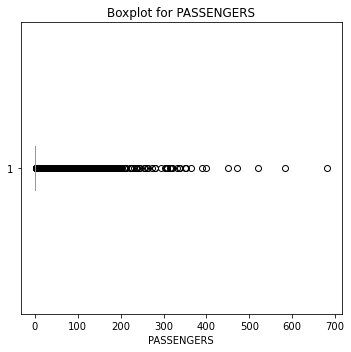

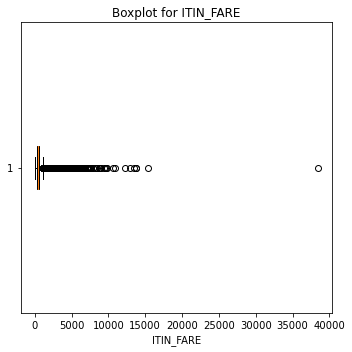

In [170]:
# Lets plot these for imputation potentially 
columns_to_numeric(tickets_cleaned, ['ITIN_FARE'])
boxplots_for_columns(tickets_cleaned, ['PASSENGERS', 'ITIN_FARE'])

In [171]:
tickets_cleaned.nlargest(10, 'PASSENGERS')

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION
214316,DTW,True,681.0,11.0,MCO
372269,MDW,True,582.0,11.0,MCO
228515,EWR,True,519.0,0.0,PBI
216316,DTW,True,471.0,11.0,TPA
479604,PHX,True,451.0,11.0,LAS
370788,MDW,True,398.0,11.0,PHX
575662,SJC,True,390.0,11.0,SAN
55713,ATL,True,365.0,11.0,MIA
668689,SJC,True,352.0,11.0,LAS
266028,HNL,True,349.0,148.0,LIH


In [172]:
tickets_cleaned.nlargest(10, 'ITIN_FARE')

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION
585640,SLC,True,1.0,38400.0,TWF
563853,SFO,True,1.0,15365.0,EWR
24804,PIH,True,1.0,13790.0,SLC
697585,PIH,True,1.0,13790.0,SLC
562804,SFO,True,1.0,13474.0,LAS
227514,EWR,True,1.0,12882.0,ORD
73253,BDL,True,1.0,12225.0,IAH
326183,LAX,True,1.0,10944.0,ORD
359739,MCI,True,1.0,10564.0,PHX
178120,DEN,True,1.0,9816.0,DAY


In [173]:
tickets_cleaned.nsmallest(10, 'ITIN_FARE')

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION
712,ABR,True,1.0,0.0,SJU
774,ABR,True,5.0,0.0,MCO
906,ABR,True,1.0,0.0,HNL
918,ABR,True,1.0,0.0,OGG
954,ABR,True,2.0,0.0,RSW
955,ABR,True,3.0,0.0,LAS
974,ABR,True,1.0,0.0,PHX
1003,ABR,True,1.0,0.0,OGG
1011,ABR,True,1.0,0.0,OGG
1027,ABR,True,1.0,0.0,OGG


### It appears the `PASSENGERS` and `ITIN_FARE` is not very clean data. <br>
- The highest `PASSENGERS` itineraries we found are certinly not right, as an Itinerary with hundreds of passengers would be expensive, and not less than `$100` like we see commonly above
- The highest `ININ_FARE` we see may be incorrect, but it's hard to tell. If these were private chartered flights, it may well be one passenger on a plane by themselves.  This could explain very high itinerary prices as private flight is expensive.
- The lowest `ININ_FARE` in the data are showing `$0` which may be accurate if something like miles, points or a gift card was used. The meatadata description does not note these situations.<br>

**DATA CLEANING ASSUMPTION**
- I will remove rows where `ITIN_FARE < 100`. This is likely to remove invalid data points where it is hard to imagine a flight that costs less than that. And if true data is removed, they are likely to be small and close airports which this airline is not inerested in offering for.


In [174]:
# See what large itineraries look like compared to their per-person fare
# This is con confirm removing itineraries < 100 is reasonable
tickets_cleaned[tickets_cleaned['PASSENGERS'] > 200].sort_values(by='ITIN_FARE', ascending=False)

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION
267358,HOU,True,307.0,523.0,DAL
266234,HNL,True,224.0,159.0,OGG
266028,HNL,True,349.0,148.0,LIH
459480,PDX,True,231.0,136.0,LAX
656493,OAK,True,238.0,117.0,SAN
575611,SJC,True,246.0,107.0,SAN
571480,SJC,True,201.0,97.0,BUR
212774,DTW,True,213.0,65.0,RSW
48328,ATL,True,255.0,29.0,FLL
588853,SMF,True,235.0,11.0,LAX


In [175]:
# Removing itineraries where Passengers >= 
tickets_cleaned = tickets_cleaned[tickets_cleaned['ITIN_FARE'] >= 100]

# Reset index
tickets_cleaned = tickets_cleaned.reset_index(drop=True)

In [176]:
tickets_cleaned.isnull().sum()

ORIGIN            0
ROUNDTRIP         0
PASSENGERS     1131
ITIN_FARE         0
DESTINATION       0
dtype: int64

- Now with that cleaning done, lets see how our imputation could work on the remaining NaNs

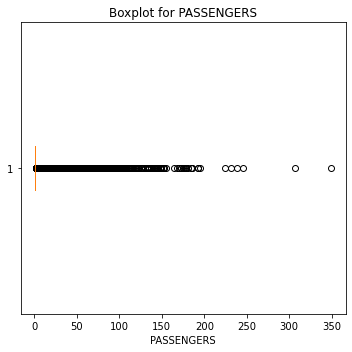

In [177]:
boxplots_for_columns(tickets_cleaned, ['PASSENGERS'])

In [178]:
tickets_cleaned['PASSENGERS'].describe()

count    654793.000000
mean          1.809262
std           3.740763
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         349.000000
Name: PASSENGERS, dtype: float64

- Although it is only 1,131 NaNs out of 655k rows, I'm siding on not imputing data here for `PASSENGERS` since the lost data is relatively small compared to imputing synthetic data into our data

In [179]:
tickets_cleaned = tickets_cleaned.dropna().reset_index(drop=True)

tickets_cleaned = get_columns_to_category(tickets_cleaned, ('ORIGIN', 'DESTINATION'))


In [180]:
tickets_cleaned['ROUTE'] = create_ROUTE_column(tickets_cleaned, 'ORIGIN', 'DESTINATION')

In [181]:
tickets_cleaned

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION,ROUTE
0,ABI,True,1.0,736.0,DAB,ABI-DAB
1,ABI,True,1.0,570.0,COS,ABI-COS
2,ABI,True,1.0,564.0,MCO,ABI-MCO
3,ABI,True,1.0,345.0,LGA,ABI-LGA
4,ABI,True,1.0,1647.0,JAX,ABI-JAX
...,...,...,...,...,...,...
654788,YAK,True,1.0,308.0,JNU,YAK-JNU
654789,YAK,True,3.0,489.0,ANC,YAK-ANC
654790,YAK,True,3.0,493.0,ANC,YAK-ANC
654791,YAK,True,1.0,371.0,JNU,YAK-JNU


In [182]:
# df to show median fare by # of passengers on itineraries between 1-10
median_fare_by_passenger = pd.DataFrame(tickets_cleaned[tickets_cleaned['PASSENGERS']
                                           .between(1, 10)]\
                                           .groupby('PASSENGERS')['ITIN_FARE'].median()).reset_index()

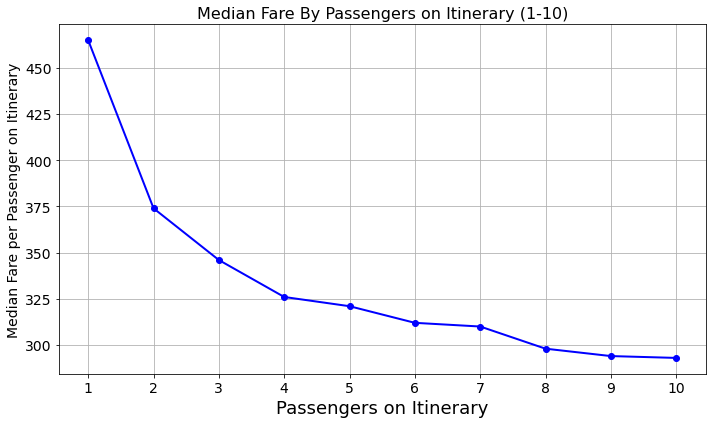

In [183]:
# Plot df above
plt.figure(figsize=(10, 6))
plt.plot(median_fare_by_passenger['PASSENGERS'], median_fare_by_passenger['ITIN_FARE'], marker='o', linestyle='-', color='blue', linewidth=2, label='Line Example')

# Add labels and title
plt.title('Median Fare By Passengers on Itinerary (1-10)', fontsize=16)
plt.xlabel('Passengers on Itinerary', fontsize=18)
plt.ylabel('Median Fare per Passenger on Itinerary', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.locator_params(axis='x', nbins=10)  # Increase number of x-ticks

plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

## The per-pserson cost of the itinerary decrease with more passengers. This is probably a quantity bulk discount effect.

In [184]:
# Create column calculating the itinerary total (passengers * per-passenger price) 
tickets_cleaned['ITIN_REVENUE'] = (tickets_cleaned['PASSENGERS'] * tickets_cleaned['ITIN_FARE'])

# simplify data
tickets_cleaned = columns_to_dtype_int32(tickets_cleaned, ['PASSENGERS', 'ITIN_FARE'])



In [185]:
tickets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654793 entries, 0 to 654792
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   ORIGIN        654793 non-null  category
 1   ROUNDTRIP     654793 non-null  bool    
 2   PASSENGERS    654793 non-null  int32   
 3   ITIN_FARE     654793 non-null  int32   
 4   DESTINATION   654793 non-null  category
 5   ROUTE         654793 non-null  category
 6   ITIN_REVENUE  654793 non-null  float64 
dtypes: bool(1), category(3), float64(1), int32(2)
memory usage: 17.0 MB


## Tickets data cleaning done<br>

## Below are the cleaning and manipulation done to the provided datasets
### Flights
- Removed duplicated data on all columns, but keeping one
- Reduced df to only `FL_DATE`, `ORIGIN`, `DESTINATION`, `DEP_DELAY`, `ARR_DELAY`, `DISTANCE`, `OCCUPANCY_RATE`, and `CANCELLED` columns
- Removed `CANCELLED` flights
- Turned `FL_DATE` to datetime dtype
- Corrected `DISTANCE` that were less than `0` and less than `5`
- Imputed `DEP_DELAY`, `ARR_DELAY` and `DISTANCE` with their median where there were NaNs
- Imputed `OCCUPANCY_RATE` with the mean where there were NaNs

### Airport codes
- Selected for data where `ISO_COUNTRY = US`
- Selected for data where `TYPE = large OR small airport`
- Dropped data where `IATA_CODE` was a `NaN`
- Select for only `TYPE` and `IATA_CODE` columns

#### -- Merging Flights and Airport codes data
- Merged `TYPE` from `airport codes` onto `flights` data by both `ORIGIN` and `DESTINATION` columns
- Dropped NaNs created from this merging
- Created `ROUTE` column that is `ORIGIN-DESTINATION`

#### Including Revenue and Cost provided assumptions
- Costs:
    - `PER_MILE_COST` = `DISTANCE` * 9.18
    - `LANDING_COST` = 5,000 if `DESTINATION_TYPE` is medium, else 10,000
    - `DEP_DELAY_COST` = if its more than 15, (`DEP_DELAY_COST` - 15) * 75
    - `ARR_DELAY_COST` = if its more than 15, (`ARR_DELAY_COST` - 15) * 75
- Revenue    
    - `OCCUPANCY` = `OCCUPANCY_RATE` * 200
    - `BAGGAGE_REVENUE` = (`OCCUPANCY` * .5) * 35
    
### Tickets
- Removed duplicated data on all columns, but keeping one
- Reduced df to only `ITIN_ID`, `YEAR`, `QUARTER`, `ORIGIN_COUNTRY`, `ORIGIN_STATE_ABR`, `ORIGIN_STATE_NM` and `REPORTING_CARRIER` columns
- Selected for itineraries that are for a `ROUNDTRIP`
- Selected for `ITIN_FARE` that are greater and equal to 100 dollars
- Dropped itineraries where `PASSENGERS` is `NaN`
- Created `ROUTE` column that is `ORIGIN-DESTINATION`



## Aggregation
- `Flights` and `Airport Codes` data was easily merged together above
- `Tickets` is yet to be merged with the other data
- Both datasets can have multiple versions of the same trips, since they have data on each flight and each itinerary seperatley
### This analysis is about round trip routes, so we can group the two datasets by the `ROUTE ` and aggregate the other columns as need to retain the information we need.

## AGGREGATING

### Starting with flights and airports dataset

In [186]:
# Group by Route and aggregate the other columns as necessary
flights_airpot_code_merged_agg = flights_airpot_code_merged.groupby(['ROUTE']).agg({'DEP_DELAY': 'sum',\
                                                                                'ARR_DELAY' : 'sum',\
                                                                                'DISTANCE' : 'sum',\
                                                                                'OCCUPANCY_RATE' : 'mean',\
                                                                                'ORIGIN_TYPE' : 'first',\
                                                                                'DESTINATION_TYPE' : 'first',\
                                                                                'ORIGIN' : 'first',\
                                                                                'DESTINATION': 'first',\
                                                                                'PER_MILE_COST' : 'sum',\
                                                                                'LANDING_COST' : 'sum',\
                                                                                'DEP_DELAY_COST' : 'sum',\
                                                                                'ARR_DELAY_COST' : 'sum',\
                                                                                'OCCUPANCY' : 'sum',\
                                                                                'BAGGAGE_REVENUE' : 'sum',\
                                                                                'FL_DATE' : 'count'})\
                                                                                .reset_index()
# Rename the columns with the agg function used
flights_airpot_code_merged_agg.rename(columns={
    'DEP_DELAY': 'DEP_DELAY_sum',
    'ARR_DELAY': 'ARR_DELAY_sum',
    'DISTANCE': 'DISTANCE_sum',
    'OCCUPANCY_RATE': 'OCCUPANCY_RATE_mean',
    'PER_MILE_COST' : 'PER_MILE_COST_sum',
    'LANDING_COST' : 'LANDING_COST_sum',
    'DEP_DELAY_COST' : 'DEP_DELAY_COST_sum',
    'ARR_DELAY_COST' : 'ARR_DELAY_COST_sum',
    'OCCUPANCY' : 'OCCUPANCY_sum',
    'BAGGAGE_REVENUE' : 'BAGGAGE_REVENUE_sum',
    'FL_DATE' : 'FLIGHT_COUNT'}, inplace=True)

In [187]:
flights_airpot_code_merged_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ROUTE                5632 non-null   category
 1   DEP_DELAY_sum        5632 non-null   int32   
 2   ARR_DELAY_sum        5632 non-null   int32   
 3   DISTANCE_sum         5632 non-null   int32   
 4   OCCUPANCY_RATE_mean  5632 non-null   float64 
 5   ORIGIN_TYPE          5632 non-null   category
 6   DESTINATION_TYPE     5632 non-null   category
 7   ORIGIN               5632 non-null   category
 8   DESTINATION          5632 non-null   category
 9   PER_MILE_COST_sum    5632 non-null   float64 
 10  LANDING_COST_sum     5632 non-null   int64   
 11  DEP_DELAY_COST_sum   5632 non-null   int64   
 12  ARR_DELAY_COST_sum   5632 non-null   int64   
 13  OCCUPANCY_sum        5632 non-null   float64 
 14  BAGGAGE_REVENUE_sum  5632 non-null   float64 
 15  FLIGHT_COUNT         

### Now aggregating tickets dataset

In [188]:
# Group by Route and aggregate the other columns as necessary
tickets_cleaned_agg = tickets_cleaned.groupby(['ROUTE']).agg({'PASSENGERS' : 'sum',\
                                                            'ITIN_FARE' : 'sum',\
                                                            'ITIN_REVENUE' : 'sum'})\
                                                            .reset_index()

# Rename the columns with the agg function used
tickets_cleaned_agg.rename(columns={
    'PASSENGERS' : 'PASSENGERS_sum',
    'ITIN_FARE' : 'ITIN_FARE_sum',
    'ITIN_REVENUE' : 'ITIN_REVENUE_sum'}, inplace=True)

In [189]:
df_final = merge_dfs_by_route(flights_airpot_code_merged_agg, tickets_cleaned_agg)

In [190]:
df_final

,ROUTE,DEP_DELAY_sum,ARR_DELAY_sum,DISTANCE_sum,OCCUPANCY_RATE_mean,ORIGIN_TYPE,DESTINATION_TYPE,ORIGIN,DESTINATION,PER_MILE_COST_sum,LANDING_COST_sum,DEP_DELAY_COST_sum,ARR_DELAY_COST_sum,OCCUPANCY_sum,BAGGAGE_REVENUE_sum,FLIGHT_COUNT,PASSENGERS_sum,ITIN_FARE_sum,ITIN_REVENUE_sum
0,ABE-ATL,1298,1185,150164,0.641567,medium_airport,large_airport,ABE,ATL,1378505.52,2170000,107100,158175,27835.0,487112.5,217,55,26223,28027.0
1,ABE-CLT,957,1068,120731,0.665976,medium_airport,large_airport,ABE,CLT,1108310.58,2510000,122100,134175,33422.0,584885.0,251,28,13358,14976.0
2,ABE-DTW,3961,2651,105400,0.639073,medium_airport,large_airport,ABE,DTW,967572.00,2480000,298125,295950,31690.0,554575.0,248,42,3279,14477.0
3,ABE-FLL,272,217,20820,0.580000,medium_airport,large_airport,ABE,FLL,191127.60,200000,17100,19125,2320.0,40600.0,20,71,13859,17384.0
4,ABE-ORD,3455,2387,103986,0.671195,medium_airport,large_airport,ABE,ORD,954591.48,1590000,274425,268800,21336.0,373380.0,159,21,9887,12403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,XNA-VPS,209,171,7212,0.571667,medium_airport,large_airport,XNA,VPS,66206.16,120000,12900,13125,1371.0,23992.5,12,13,2930,3191.0
5508,YAK-JNU,-1174,-1222,17424,0.678636,medium_airport,medium_airport,YAK,JNU,159952.32,440000,42750,36150,11944.0,209020.0,88,24,7374,7922.0
5509,YKM-SEA,3545,3506,31415,0.660393,medium_airport,large_airport,YKM,SEA,288389.70,3050000,213375,224625,40271.0,704742.5,305,41,5086,10978.0
5510,YUM-DFW,448,433,28616,0.637143,medium_airport,large_airport,YUM,DFW,262694.88,280000,36225,40650,3567.0,62422.5,28,4,1837,1837.0


### Looking at the table above, we have a ticket data issue. There are many instances where there are more flights along a route than there are Passengers that rode on that route. Look below for an example.

In [191]:
flights[(flights['ORIGIN'] == 'LAX')\
        & (flights['DESTINATION'] == 'JFK')]\
        ['FL_DATE'].count()

3190

In [192]:
tickets[(tickets['ORIGIN'] == 'LAX')\
        & (tickets['DESTINATION'] == 'JFK')\
        & (tickets['ROUNDTRIP'] == 1)]\
        ['PASSENGERS'].sum()

2278.0

- The above is pulling data from `flights` and `tickets` datasets where only the duclicated rows where removed, so minimal cleaning. There a total of 3,190 flights from `LAX -> JFC`. However, in the tickets data, there are a total of 2,278 ticketed people for that same flight route.
- This is an issue because our `ITIN_REVENUE_sum` coumn relies on the number of `PASSENGERS` multiplied by the per-person `ITIN_FARE`, and if the # of passengers looks unreasonable the revenue would be too.
- This is probably a data issue with the ticketing data. My guess is the raw ticketing data was sampled before it was provided for this data challenge.
### Mitigtion strategy used
- According to the instructions, each flight can hold up to 200 people. And we know the occupancy rate for each flight. <br>
- The workaround for this data issue I'll use is to add a new column called `INFERRED_PASSENGERS = (FLIGHT_COUNT * 200) * OCCUPANCY_RATE_mean`<br>
- I will add another column `MEDIAN_ROUTE_ITIN_FARE` which will be the median of the `ITIN_FARE` for that particular `ROUTE` since we saw in the previous boxplots `ITIN_FARE` has skew<br>
- This will allow us to calculate a new column `INFERRED_ITIN_REVENUE_sum = MEDIAN_ROUTE_ITIN_FARE * INFERRED_PASSENGERS`, which would produce more reasonable flight revenue values for each route


In [193]:

df_final['INFERRED_PASSENGERS'] = (df_final['FLIGHT_COUNT'] * 200) * df_final['OCCUPANCY_RATE_mean']

In [194]:

tickets_median_route_ITIN_FARE_agg = tickets_cleaned.groupby('ROUTE')['ITIN_FARE']\
                                                    .agg('median')\
                                                    .reset_index()\
                                                    .rename(columns={'ITIN_FARE': 'MEDIAN_ROUTE_ITIN_FARE'})

df_final = merge_dfs_by_route(df_final, tickets_median_route_ITIN_FARE_agg)

In [195]:

df_final['INFERRED_ITIN_REVENUE'] = df_final['INFERRED_PASSENGERS'] * df_final['MEDIAN_ROUTE_ITIN_FARE']

## Adding a Standardized Route column
- This is an important column for properly answering the tasks for the challenge
- Currently our merged dataset has unique Routes
    - So there is only 1 row for `JFK -> NYC` for example
    - `NYC -> JFK` is another seperate row with seperate aggregated sums for thing like costs and revenue
- However, we are answering questions on round trips, which is a flight to a destination then returning to airport of origin. So `origin -> destination` is only half of the answer; we still need the `destination -> origin` flight to occur for it to be a true round trip.
- Also, the `ITIN_FARE` value represents the cost for a round trip (since we filtered-out 1-way trips earlier). That is two seperate flights the customer payed for.
- The order of the flights we can ignored
    - For our puposes of helping this airline, when they offer a round-trip route, like NYC to JFK and back, it serves passengers from both locations. It is offering travel for people who live in NYC and want to go to JFK, and from people in JFK who want to go to NYC—not just one side.
    - A single flight can have passengers with both legs of their journeys. Someone flying from `A` to `B` for a wedding, can be sitting next to someone returning to their home in `B` from a business meeting that occured in `A`, and they flew there a few day earlier
    

In [196]:
# Add standardized route column
df_final = create_standardized_route_col(df_final)


In [197]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5511
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ROUTE                   5512 non-null   object  
 1   DEP_DELAY_sum           5512 non-null   int32   
 2   ARR_DELAY_sum           5512 non-null   int32   
 3   DISTANCE_sum            5512 non-null   int32   
 4   OCCUPANCY_RATE_mean     5512 non-null   float64 
 5   ORIGIN_TYPE             5512 non-null   category
 6   DESTINATION_TYPE        5512 non-null   category
 7   ORIGIN                  5512 non-null   category
 8   DESTINATION             5512 non-null   category
 9   PER_MILE_COST_sum       5512 non-null   float64 
 10  LANDING_COST_sum        5512 non-null   int64   
 11  DEP_DELAY_COST_sum      5512 non-null   int64   
 12  ARR_DELAY_COST_sum      5512 non-null   int64   
 13  OCCUPANCY_sum           5512 non-null   float64 
 14  BAGGAGE_REVENUE_sum     

In [199]:
# Adjusting dtypes
df_final = get_columns_to_category(df_final, ['ROUTE', 'STANDARDIZED_ROUTE'])

df_final = columns_to_dtype_int32(df_final, ['OCCUPANCY_sum', 'ITIN_REVENUE_sum',\
                                             'BAGGAGE_REVENUE_sum', 'INFERRED_PASSENGERS',\
                                            'INFERRED_ITIN_REVENUE', 'MEDIAN_ROUTE_ITIN_FARE'])

In [248]:
df_final

,ROUTE,DEP_DELAY_sum,ARR_DELAY_sum,DISTANCE_sum,OCCUPANCY_RATE_mean,ORIGIN_TYPE,DESTINATION_TYPE,ORIGIN,DESTINATION,PER_MILE_COST_sum,...,OCCUPANCY_sum,BAGGAGE_REVENUE_sum,FLIGHT_COUNT,PASSENGERS_sum,ITIN_FARE_sum,ITIN_REVENUE_sum,INFERRED_PASSENGERS,MEDIAN_ROUTE_ITIN_FARE,INFERRED_ITIN_REVENUE,STANDARDIZED_ROUTE
0,ABE-ATL,1298,1185,150164,0.641567,medium_airport,large_airport,ABE,ATL,1378505.52,...,27835,487112,217,55,26223,28027,27844,495,13796702,ABE-ATL
1,ABE-CLT,957,1068,120731,0.665976,medium_airport,large_airport,ABE,CLT,1108310.58,...,33422,584885,251,28,13358,14976,33432,506,16916592,ABE-CLT
2,ABE-DTW,3961,2651,105400,0.639073,medium_airport,large_airport,ABE,DTW,967572.00,...,31690,554575,248,42,3279,14477,31698,531,16831638,ABE-DTW
3,ABE-FLL,272,217,20820,0.580000,medium_airport,large_airport,ABE,FLL,191127.60,...,2320,40600,20,71,13859,17384,2320,225,523160,ABE-FLL
4,ABE-ORD,3455,2387,103986,0.671195,medium_airport,large_airport,ABE,ORD,954591.48,...,21336,373380,159,21,9887,12403,21343,544,11611135,ABE-ORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,XNA-VPS,209,171,7212,0.571667,medium_airport,large_airport,XNA,VPS,66206.16,...,1371,23992,12,13,2930,3191,1372,243,333396,VPS-XNA
5508,YAK-JNU,-1174,-1222,17424,0.678636,medium_airport,medium_airport,YAK,JNU,159952.32,...,11944,209020,88,24,7374,7922,11944,338,4037072,JNU-YAK
5509,YKM-SEA,3545,3506,31415,0.660393,medium_airport,large_airport,YKM,SEA,288389.70,...,40271,704742,305,41,5086,10978,40283,239,9627875,SEA-YKM
5510,YUM-DFW,448,433,28616,0.637143,medium_airport,large_airport,YUM,DFW,262694.88,...,3567,62422,28,4,1837,1837,3568,464,1655552,DFW-YUM


# This concludes our data cleaning and munging

# Task 1
### The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation.***<br><br>
We are asked for the # of round trip flights, with 'round trip' defined in the instructions as a flight pairing each `(origin → destination)` with its reverse `(destination → origin)` (*Example being JFK to ORD and ORD to JFK as one round trip*).<br><br>
**ASSUMPTIONS**
- We assume that round-trip routes are defined by the airports visited, regardless of the starting point or travel timing. For example, a trip from NYC to OKC and back to NYC is considered equivalent to a trip from OKC to NYC and back to OKC.<br><br>
- Althought it is common for a round trip ticket to be with the same airline, the task did not mention to call that out. Therefore, the distinct operating airlines were not included.<br><br>
- Becuase the instructions or data did not mention connecting flights, the data was not treated with that in mind

In [204]:
# Aggregating data from df for task 1
# flight count is 'min' beacuse a round trip has to have both directions, so the minimum \
# of the standardized route is the number of actual round trips
flight_route_counts = df_final.groupby(['STANDARDIZED_ROUTE']).agg({'FLIGHT_COUNT' : 'min'})\
                                                              .reset_index()\
                                                              .sort_values(by='FLIGHT_COUNT', ascending=False)


In [211]:
# Selecting for top 10
flight_route_counts = flight_route_counts.head(10)

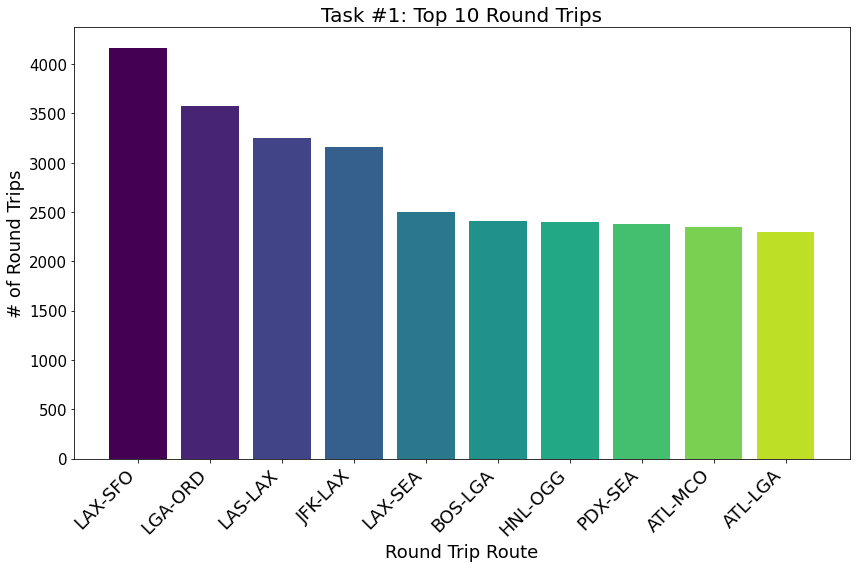

In [210]:
bar_chart(flight_route_counts['STANDARDIZED_ROUTE'],\
          flight_route_counts['FLIGHT_COUNT'],\
          'Task #1: Top 10 Round Trips',\
          'Round Trip Route',\
          '# of Round Trips',\
          'viridis')

## Task 2
***The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.***<br><br>


- Cancelled flights were removed in data cleaning section above

In [217]:
route_revenue_and_costs = df_final.groupby(['STANDARDIZED_ROUTE'])\
                                    .agg({'PER_MILE_COST_sum' : 'sum',\
                                        'LANDING_COST_sum' : 'sum',\
                                        'DEP_DELAY_COST_sum' : 'sum',\
                                        'ARR_DELAY_COST_sum' : 'sum',\
                                        'BAGGAGE_REVENUE_sum' : 'sum',\
                                        'ITIN_REVENUE_sum' : 'sum',\
                                        'PER_MILE_COST_sum' : 'sum',\
                                        'PASSENGERS_sum' : 'sum',\
                                        'OCCUPANCY_RATE_mean' : 'first',\
                                        'INFERRED_PASSENGERS' : 'sum',\
                                        'INFERRED_ITIN_REVENUE' : 'sum',\
                                        'FLIGHT_COUNT' : 'min',})\
                                    .sort_values(by='FLIGHT_COUNT', ascending=False)\
                                    .reset_index()




In [218]:
# Adding total revenue, total cost, and profit
route_revenue_and_costs['TOTAL_REVENUE_M'] = ((route_revenue_and_costs['INFERRED_ITIN_REVENUE']\
                                            + route_revenue_and_costs['BAGGAGE_REVENUE_sum']) / 1000000)

route_revenue_and_costs['TOTAL_COST_M'] = ((route_revenue_and_costs['PER_MILE_COST_sum']\
                                            + route_revenue_and_costs['LANDING_COST_sum']\
                                            + route_revenue_and_costs['DEP_DELAY_COST_sum']\
                                            + route_revenue_and_costs['ARR_DELAY_COST_sum']) / 1000000)

route_revenue_and_costs['TOTAL_PROFIT_M'] = (route_revenue_and_costs['TOTAL_REVENUE_M']\
                                            - route_revenue_and_costs['TOTAL_COST_M'])


In [219]:
top_10_most_profitable = route_revenue_and_costs.sort_values(by='TOTAL_PROFIT_M', ascending=False).head(10)

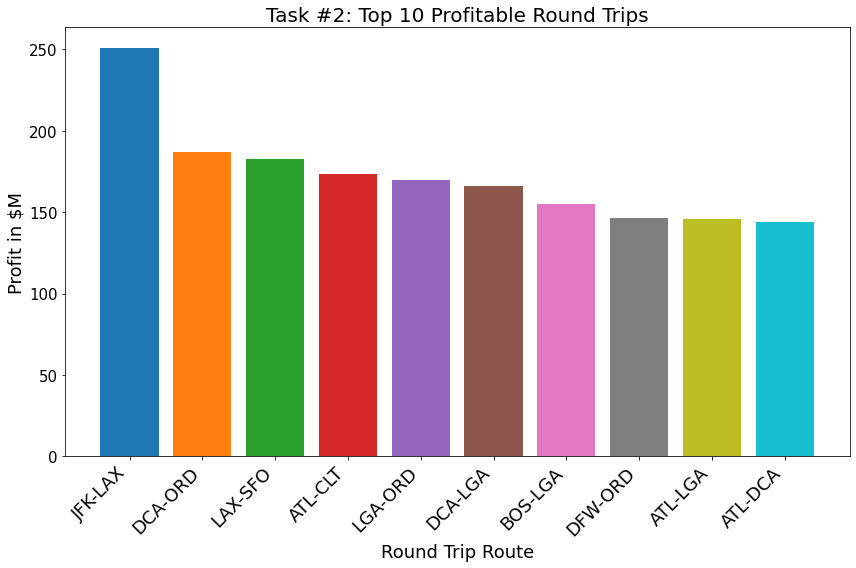

In [221]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          top_10_most_profitable['TOTAL_PROFIT_M'],\
          'Task #2: Top 10 Profitable Round Trips',\
          'Round Trip Route',\
          'Profit in $M',\
          'tab10')

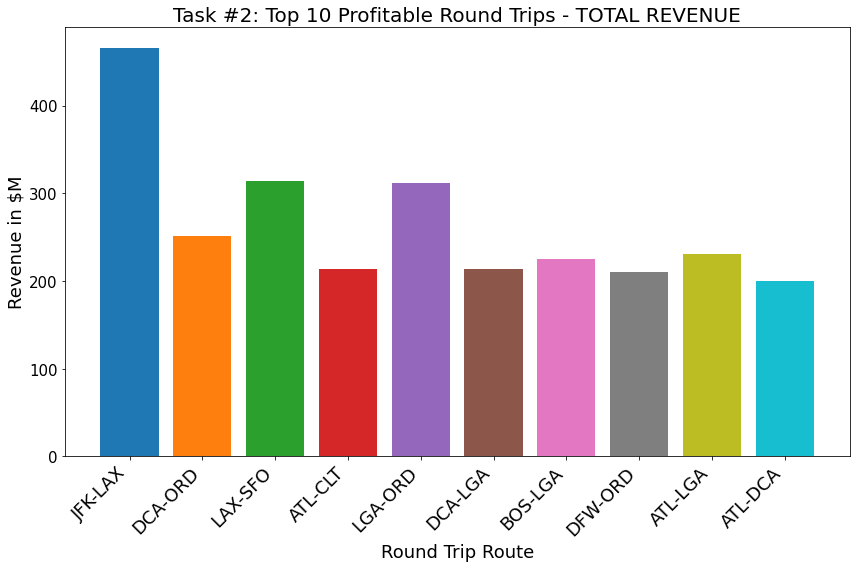

In [222]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          top_10_most_profitable['TOTAL_REVENUE_M'],\
          'Task #2: Top 10 Profitable Round Trips - TOTAL REVENUE',\
          'Round Trip Route',\
          'Revenue in $M',\
          'tab10')

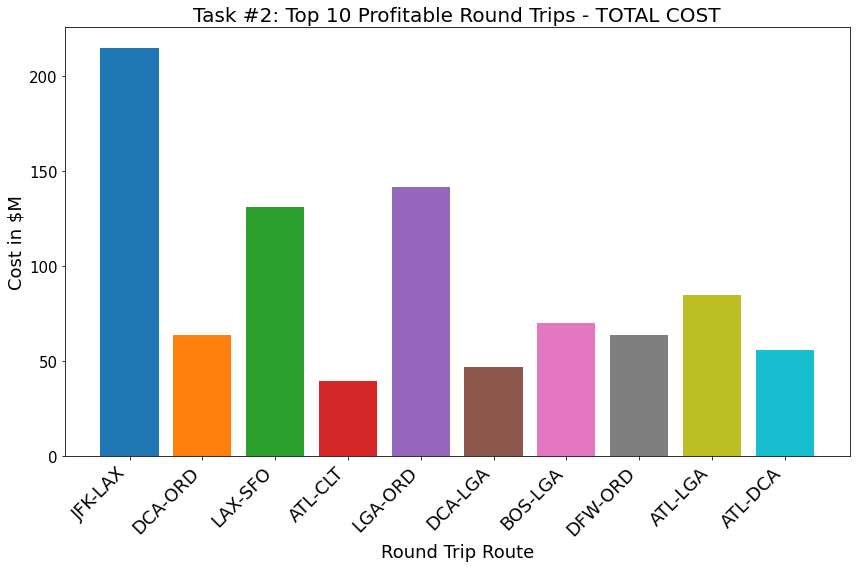

In [223]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          top_10_most_profitable['TOTAL_COST_M'],\
          'Task #2: Top 10 Profitable Round Trips - TOTAL COST',\
          'Round Trip Route',\
          'Cost in $M',\
          'tab10')

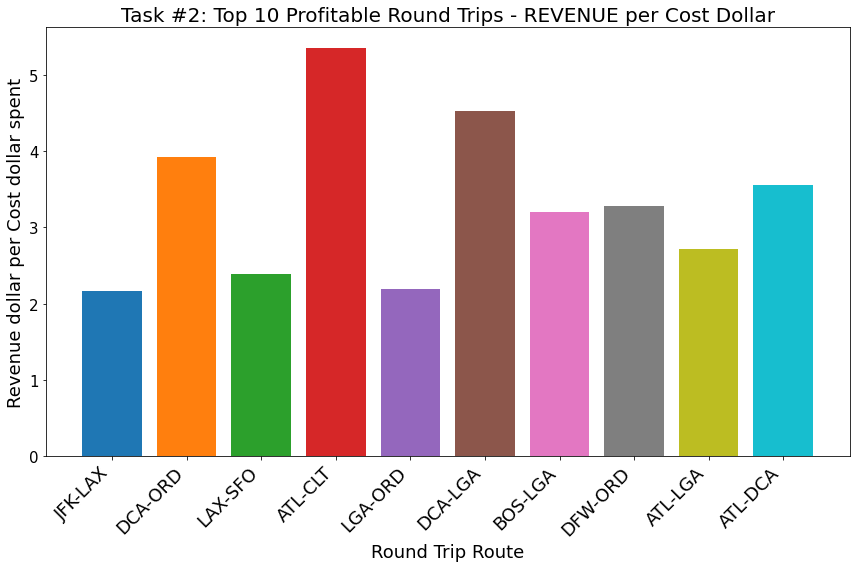

In [224]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          (top_10_most_profitable['TOTAL_REVENUE_M'] / top_10_most_profitable['TOTAL_COST_M']),\
          'Task #2: Top 10 Profitable Round Trips - REVENUE per Cost Dollar',\
          'Round Trip Route',\
          'Revenue dollar per Cost dollar spent',\
          'tab10')

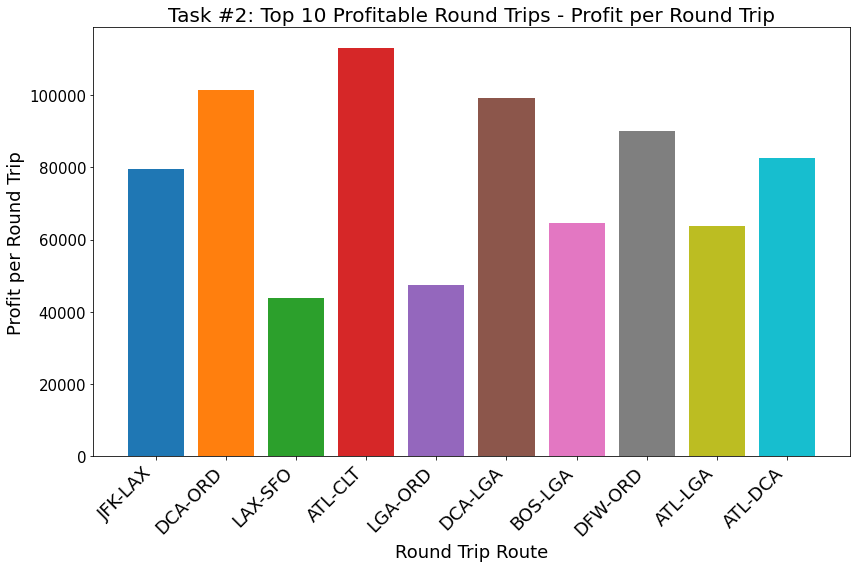

In [225]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          ((top_10_most_profitable['TOTAL_PROFIT_M'] / top_10_most_profitable['FLIGHT_COUNT'])*1000000),\
          'Task #2: Top 10 Profitable Round Trips - Profit per Round Trip',\
          'Round Trip Route',\
          'Profit per Round Trip',\
          'tab10')

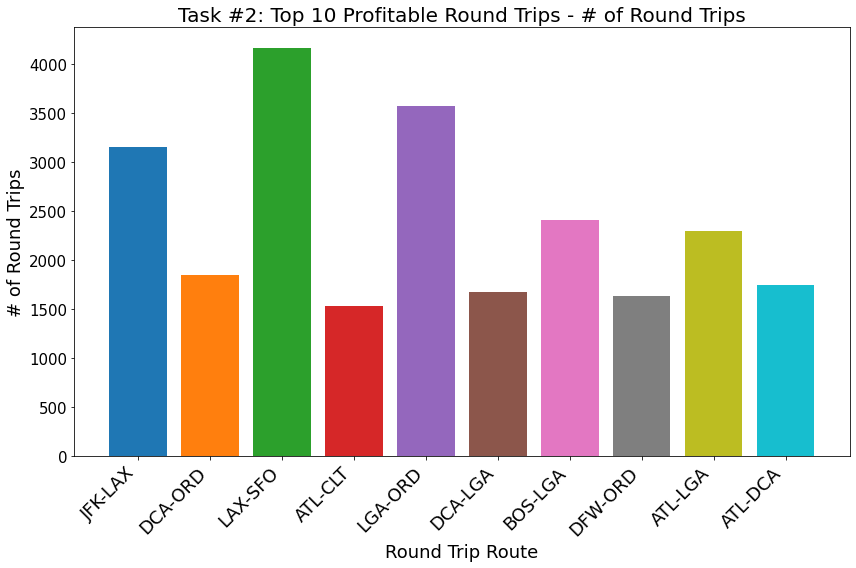

In [226]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          top_10_most_profitable['FLIGHT_COUNT'],\
          'Task #2: Top 10 Profitable Round Trips - # of Round Trips',\
          'Round Trip Route',\
          '# of Round Trips',\
          'tab10')

## Task 3 <br>
**The 5 round trip routes that you recommend to invest in based on any factors that you
choose.**<br>
Since the problem statement is helping a airline company enter into the US market wisely, all the provided data has to be from current airlines operating in the US market. This was also indicated by the `flights` data already having the airline category for its observations.<br>
As a airline entering the market, there are two main consideration:
1) Profitablility<br>
2) Maintaining positive and punctual brand image drawing customers and market share<br>

We will create a metric that will assess these goals.
- First, we will fliter a df used for Task 2 (`route_revenue_and_costs`) for the top 25 most customers using `INFERRED_PASSENGERS`
    
- We will need a measure of an airpots ability to stay on time. This can be related to staffing levels, preparedness for flights, maintenance, etc.
    - We will utilize `DEP_DELAY_COST_sum` and `ARR_DELAY_COST_sum` as measures for punctuality and control for outliers by dividing their sum by `FLIGHT_COUNT`
    - Althought this is a cost, it still is a good measure for an airport's timeliness 
- We will utilize `TOTAL_PROFIT_M` for profitability
    - Trips with the highest profits present the best entry opportunities for a new business, as they tend to have less aggressive pricing competition and leave more room for you to capture profit.



In [231]:
recommend_5_flights_df = route_revenue_and_costs.sort_values(by='INFERRED_PASSENGERS', ascending=False).head(20)

In [232]:
# Create column measuring punctuality
recommend_5_flights_df['PUNCTUALITY'] = (recommend_5_flights_df['DEP_DELAY_COST_sum']\
                                        + recommend_5_flights_df['ARR_DELAY_COST_sum'])\
                                        / recommend_5_flights_df['FLIGHT_COUNT']

recommend_5_flights_df['PUNCTUALITY_NORM'] = 1 - ((recommend_5_flights_df['PUNCTUALITY']\
                                              - recommend_5_flights_df['PUNCTUALITY'].min())\
                                              / (recommend_5_flights_df['PUNCTUALITY'].max()\
                                              - recommend_5_flights_df['PUNCTUALITY'].min()))

# Create column measuring profitablility
recommend_5_flights_df['PROFITABILITY'] = (recommend_5_flights_df['TOTAL_PROFIT_M']\
                                              - recommend_5_flights_df['TOTAL_PROFIT_M'].min())\
                                              / (recommend_5_flights_df['TOTAL_PROFIT_M'].max()\
                                              - recommend_5_flights_df['TOTAL_PROFIT_M'].min())

recommend_5_flights_df['RECCOMENDATION_METRIC'] = recommend_5_flights_df['PUNCTUALITY_NORM']\
                                                    + recommend_5_flights_df['PROFITABILITY']

recommend_5_flights_df['RECCOMENDATION_METRIC'] = (recommend_5_flights_df['RECCOMENDATION_METRIC']\
                                              - recommend_5_flights_df['RECCOMENDATION_METRIC'].min())\
                                              / (recommend_5_flights_df['RECCOMENDATION_METRIC'].max()\
                                              - recommend_5_flights_df['RECCOMENDATION_METRIC'].min())

In [233]:
recommend_5_flights_df = recommend_5_flights_df.sort_values(by='RECCOMENDATION_METRIC', ascending=False).head(5)

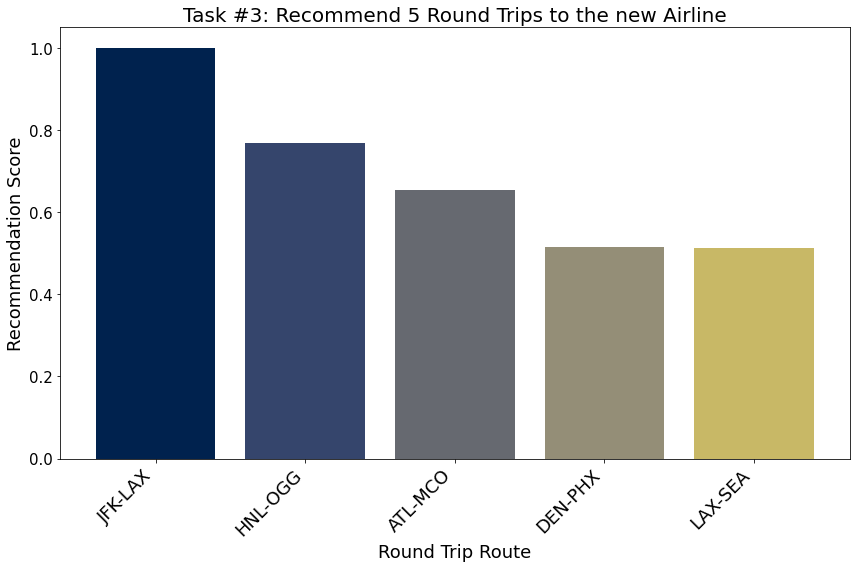

In [234]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          recommend_5_flights_df['RECCOMENDATION_METRIC'],\
          'Task #3: Recommend 5 Round Trips to the new Airline',\
          'Round Trip Route',\
          'Recommendation Score',\
          'cividis')

## Task 4 <br>
**The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.**<br>

### Assumptions to answer question
 - Assumming this new airline will have the below items the same as their competition
     - Costs
         - Departure delays
         - Arrival delays
         - Per-mile operation costs (fuel, insurance, maintnence, etc.)
     - Revenue
         - Itinerary fare rates
         - Occupancy rates
         - Customer baggage rate and fare

In [235]:
recommend_5_flights_df

,STANDARDIZED_ROUTE,PER_MILE_COST_sum,LANDING_COST_sum,DEP_DELAY_COST_sum,ARR_DELAY_COST_sum,BAGGAGE_REVENUE_sum,ITIN_REVENUE_sum,PASSENGERS_sum,OCCUPANCY_RATE_mean,INFERRED_PASSENGERS,INFERRED_ITIN_REVENUE,FLIGHT_COUNT,TOTAL_REVENUE_M,TOTAL_COST_M,TOTAL_PROFIT_M,PUNCTUALITY,PUNCTUALITY_NORM,PROFITABILITY,RECCOMENDATION_METRIC
3,JFK-LAX,1.435936e+08,63200000,4053225,4102575,14376827,3637732,5320,0.646843,821693,451577861,3158,465.954688,214.949360,251.005328,2582.583914,0.614962,1.000000,1.000000
6,HNL-OGG,4.400892e+06,35945000,400575,458025,10864175,485197,2571,0.648241,620950,163957248,2395,174.821423,41.204492,133.616931,358.496868,1.000000,0.295466,0.767355
8,ATL-MCO,1.745695e+07,47070000,1779450,1776000,10697539,652101,2006,0.647097,611424,198395888,2351,209.093427,68.082395,141.011032,1512.313909,0.800249,0.339844,0.654217
14,DEN-PHX,2.172412e+07,39310000,1835550,1765950,8947749,1079433,3474,0.650890,511403,174392867,1965,183.340616,64.635621,118.704995,1832.824427,0.744762,0.205969,0.516330
4,LAX-SEA,4.377984e+07,49990000,2835225,3173550,11447432,934308,3158,0.655552,654284,222949513,2497,234.396945,99.778617,134.618328,2406.397677,0.645464,0.301476,0.513570


In [236]:
# get profit per flight for each of the 5

recommend_5_flights_df['PROFIT_PER_FLIGHT'] = ((recommend_5_flights_df['TOTAL_PROFIT_M']\
                                      / recommend_5_flights_df['FLIGHT_COUNT']) * 1000000)

# Get number of flights for that roundtrip profit to total at least $90M
recommend_5_flights_df['FLIGHTS_TO_RECOUP_INVESTMENT'] = np.ceil(90000000 / \
                                                                 recommend_5_flights_df['PROFIT_PER_FLIGHT'])\
                                                                 .astype('int32')




In [237]:
recommend_5_flights_df

,STANDARDIZED_ROUTE,PER_MILE_COST_sum,LANDING_COST_sum,DEP_DELAY_COST_sum,ARR_DELAY_COST_sum,BAGGAGE_REVENUE_sum,ITIN_REVENUE_sum,PASSENGERS_sum,OCCUPANCY_RATE_mean,INFERRED_PASSENGERS,...,FLIGHT_COUNT,TOTAL_REVENUE_M,TOTAL_COST_M,TOTAL_PROFIT_M,PUNCTUALITY,PUNCTUALITY_NORM,PROFITABILITY,RECCOMENDATION_METRIC,PROFIT_PER_FLIGHT,FLIGHTS_TO_RECOUP_INVESTMENT
3,JFK-LAX,1.435936e+08,63200000,4053225,4102575,14376827,3637732,5320,0.646843,821693,...,3158,465.954688,214.949360,251.005328,2582.583914,0.614962,1.000000,1.000000,79482.371121,1133
6,HNL-OGG,4.400892e+06,35945000,400575,458025,10864175,485197,2571,0.648241,620950,...,2395,174.821423,41.204492,133.616931,358.496868,1.000000,0.295466,0.767355,55789.950313,1614
8,ATL-MCO,1.745695e+07,47070000,1779450,1776000,10697539,652101,2006,0.647097,611424,...,2351,209.093427,68.082395,141.011032,1512.313909,0.800249,0.339844,0.654217,59979.171399,1501
14,DEN-PHX,2.172412e+07,39310000,1835550,1765950,8947749,1079433,3474,0.650890,511403,...,1965,183.340616,64.635621,118.704995,1832.824427,0.744762,0.205969,0.516330,60409.666585,1490
4,LAX-SEA,4.377984e+07,49990000,2835225,3173550,11447432,934308,3158,0.655552,654284,...,2497,234.396945,99.778617,134.618328,2406.397677,0.645464,0.301476,0.513570,53912.025519,1670


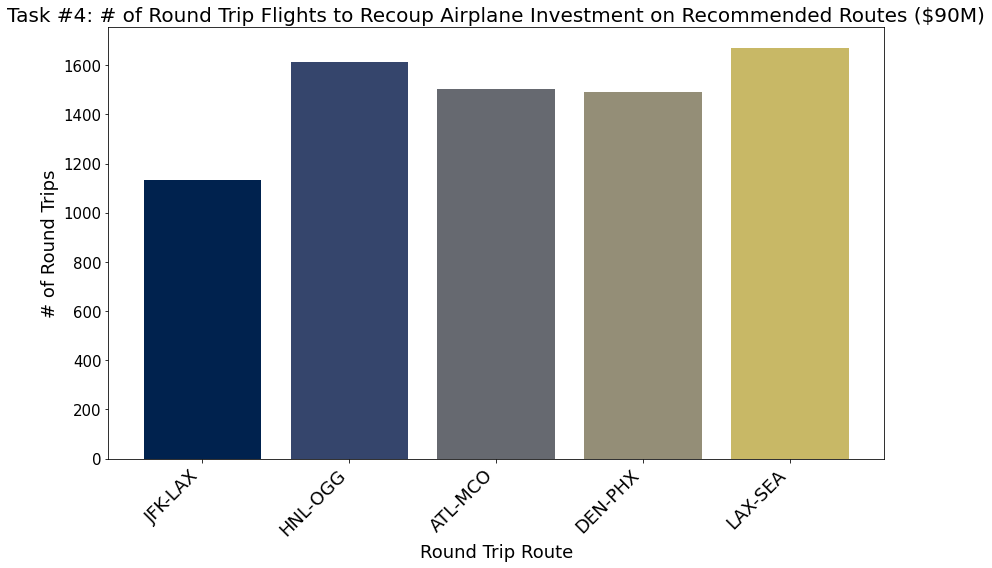

In [238]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          recommend_5_flights_df['FLIGHTS_TO_RECOUP_INVESTMENT'],\
          'Task #4: # of Round Trip Flights to Recoup Airplane Investment on Recommended Routes ($90M)',\
          'Round Trip Route',\
          '# of Round Trips',\
          'cividis')

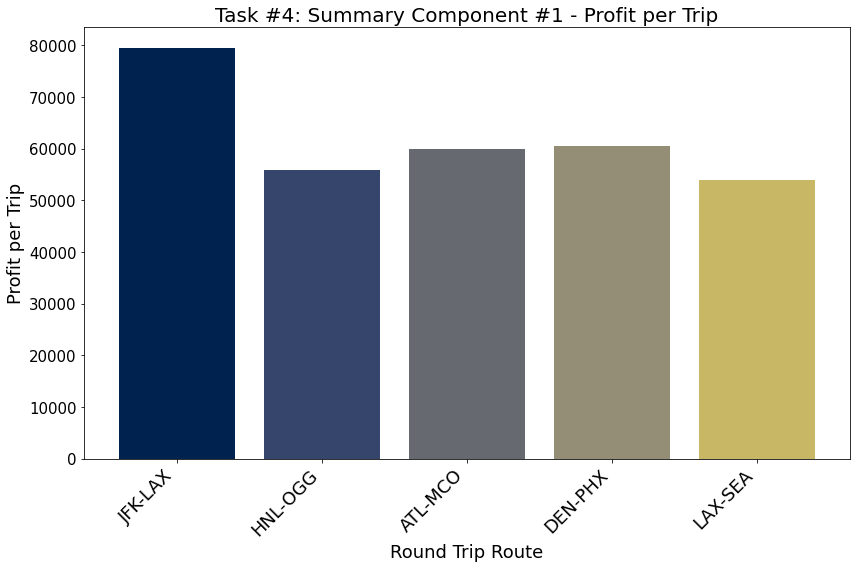

In [239]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          recommend_5_flights_df['PROFIT_PER_FLIGHT'],\
          'Task #4: Summary Component #1 - Profit per Trip',\
          'Round Trip Route',\
          'Profit per Trip',\
          'cividis')

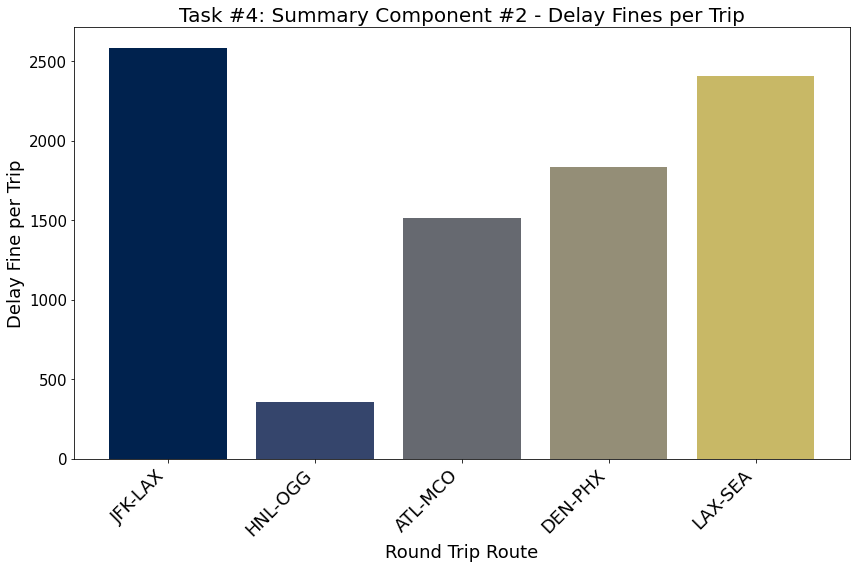

In [240]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          recommend_5_flights_df['PUNCTUALITY'],\
          'Task #4: Summary Component #2 - Delay Fines per Trip',\
          'Round Trip Route',\
          'Delay Fine per Trip',\
          'cividis')

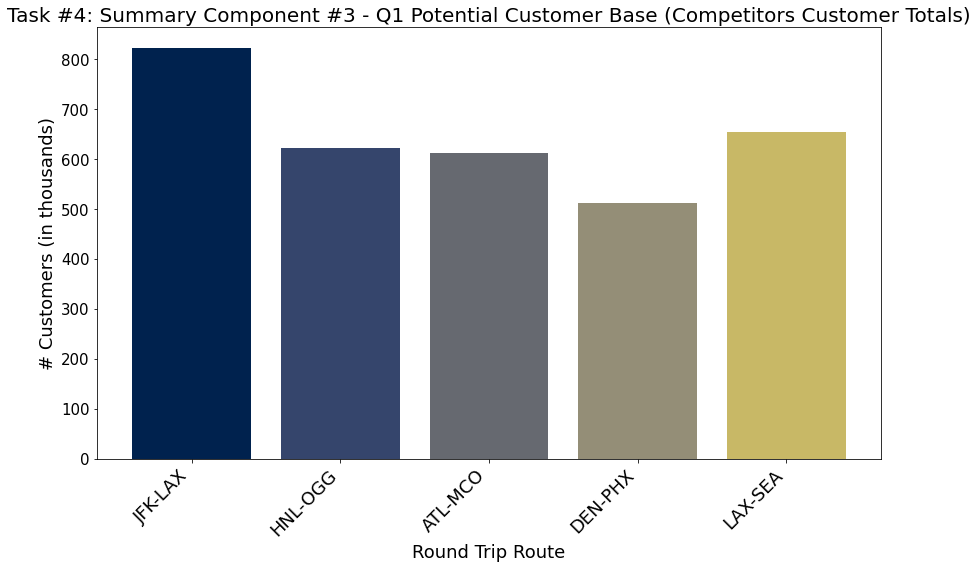

In [241]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          (recommend_5_flights_df['INFERRED_PASSENGERS'] / 1000),\
          'Task #4: Summary Component #3 - Q1 Potential Customer Base (Competitors Customer Totals)',\
          'Round Trip Route',\
          '# Customers (in thousands)',\
          'cividis')

## Task 5 <br>
**Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.**<br>


Looking at metrics discussed online

Revenue per Available Seat Mile (RASK):
Total revenue ÷ Available Seat Kilometers (ASK)

Cost per Available Seat Kilometer (CASK):
Operating cost ÷ ASK (used to assess cost efficiency)

Yield:
Revenue per passenger per kilometer.

Ancillary Revenue:

In [298]:
kpi = df_final.groupby(['STANDARDIZED_ROUTE']).agg({'DISTANCE_sum' : 'sum',\
                                        'FLIGHT_COUNT' : 'min',
                                        'INFERRED_ITIN_REVENUE' : 'sum',})\
                                  .sort_values(by='FLIGHT_COUNT', ascending=False)\
                                  .reset_index()

kpi = kpi[kpi['STANDARDIZED_ROUTE'].isin(['JFK-LAX', 'HNL-OGG', 'ATL-MCO', 'DEN-PHX', 'LAX-SEA'])]

kpi['ASM'] = np.int64(kpi['DISTANCE_sum']) * 200

kpi['REVENUE_per_ASM'] = kpi['INFERRED_ITIN_REVENUE'] / kpi['ASM']

kpi = kpi[['STANDARDIZED_ROUTE', 'REVENUE_per_ASM']].sort_values(by='REVENUE_per_ASM', ascending=False)

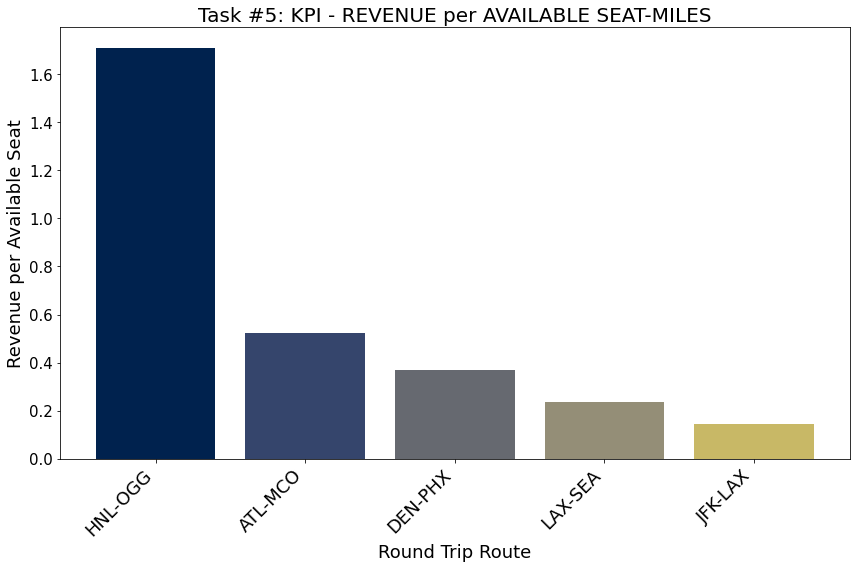

In [299]:
bar_chart(kpi['STANDARDIZED_ROUTE'],\
          kpi['REVENUE_per_ASM'],\
          'Task #5: KPI - REVENUE per AVAILABLE SEAT-MILES',\
          'Round Trip Route',\
          'Revenue per Available Seat',\
          'cividis')

In [258]:
df_final.nlargest(10, 'INFERRED_ITIN_REVENUE')

,ROUTE,DEP_DELAY_sum,ARR_DELAY_sum,DISTANCE_sum,OCCUPANCY_RATE_mean,ORIGIN_TYPE,DESTINATION_TYPE,ORIGIN,DESTINATION,PER_MILE_COST_sum,...,OCCUPANCY_sum,BAGGAGE_REVENUE_sum,FLIGHT_COUNT,PASSENGERS_sum,ITIN_FARE_sum,ITIN_REVENUE_sum,INFERRED_PASSENGERS,MEDIAN_ROUTE_ITIN_FARE,INFERRED_ITIN_REVENUE,STANDARDIZED_ROUTE
2577,JFK-LAX,15822,-332,7816050,0.646843,large_airport,large_airport,JFK,LAX,71751339.00,...,408465,7148137,3158,3165,842749,2159492,408546,582,237773772,JFK-LAX
2793,LAX-JFK,38189,-11701,7825950,0.653302,large_airport,large_airport,LAX,JFK,71842221.00,...,413068,7228690,3162,2155,678795,1478240,413147,517,213804089,JFK-LAX
4949,SFO-LAX,69561,59365,1407312,0.652986,large_airport,large_airport,SFO,LAX,12919124.16,...,545261,9542067,4176,2361,187115,578720,545374,283,154340842,LAX-SFO
3842,ORD-LGA,80443,73415,2624140,0.649531,large_airport,large_airport,ORD,LGA,24089605.20,...,464964,8136870,3580,2390,274659,732893,465064,319,148355416,LGA-ORD
2934,LGA-ORD,72245,66907,2621208,0.648716,large_airport,large_airport,LGA,ORD,24062689.44,...,463851,8117392,3576,2076,229260,619486,463962,316,146843973,LGA-ORD
2603,JFK-SFO,26847,15346,4809960,0.654978,large_airport,large_airport,JFK,SFO,44155432.80,...,243604,4263070,1860,1781,778270,1312148,243651,582,141805463,JFK-SFO
2832,LAX-SFO,84538,71497,1403268,0.645029,large_airport,large_airport,LAX,SFO,12882000.24,...,537067,9398672,4164,1671,153399,410996,537180,262,140741160,LAX-SFO
3799,ORD-DCA,22753,14516,1130976,0.649085,large_airport,large_airport,ORD,DCA,10382359.68,...,239854,4197445,1848,874,191299,405407,239902,510,122350020,DCA-ORD
1238,DCA-ORD,15299,9265,1130364,0.646757,large_airport,large_airport,DCA,ORD,10376741.52,...,238854,4179945,1847,459,128659,230831,238911,505,120650559,DCA-ORD
136,ATL-CLT,10545,1677,346910,0.644169,large_airport,large_airport,ATL,CLT,3184633.80,...,197718,3460065,1535,194,60227,106358,197759,572,113118719,ATL-CLT
